In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import statsmodels.api as sm
import statsmodels.tsa as tsa

import math

import tkinter as tk
from tkinter import filedialog

from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

import os

import matplotlib.pyplot as plt

#My custom library
import pipelinefunctions as pipe

#This lets us save sklearn.linear_model objects
import pickle

import pathlib

import multiprocessing as mp

#This was weird, logging is supposed to help with debugging complicated situations but it just makes thigns a mess
# import logging
# logger = mp.log_to_stderr()
# logger.setLevel(mp.SUBDEBUG)

#This is a weird tool we use to facilitate multiprocessing
from functools import partial
import optuna

In [2]:
#Identify folder with the "order" file

#TKinter stuff

#What TKinter does is open up a dialog window to let you select the working directory you want

#@Dave This does the same stuff as Pathlib largely but this TKinter gives me some nice features that are convenient for how this code works

#If the script appears to be frozen and stuck on this step, there is often a dialog window that has opened up BEHIND all your
#screens, go find it and pick the right directory and everything will continue onwards.

application_window = tk.Tk()
#You NEED this line or else tkinter has tiny little featureless windows that appears everywhere.
application_window.withdraw() 

project_path = filedialog.askdirectory()

# project_path = "../Q3PredsOutput"

predictpath = pathlib.Path(project_path + '/predict')
predictpath.mkdir(parents=True, exist_ok=True)

alphapath = pathlib.Path(project_path + '/Alpha Generation')
alphapath.mkdir(parents=True, exist_ok=True)

In [3]:
#Download information from database on company of interest.

order_file = pd.read_excel(project_path+"/order.xlsx", engine='openpyxl')

if 'Company' in order_file.columns:
    order_file.rename(columns={'Company':'Companies'}, inplace=True)

#We do this for ocmpanies like Ambu A/S.
#The name gets read as a file path which causes a bunch of fun crashes
order_file['Companies'] = order_file['Companies'].replace("/", "\\")
orders=order_file

#download_sql downloads each company in the orders list.
#pipe.download_sql(order=orders['Companies'], project_path=project_path)

In [2]:
#pick market files folder -- user inputs where the files they want to process are
#Supported are the MARKET files, NOT Company trackers (code could be adapted later)

application_window = tk.Tk()
#You NEED this line or else tkinter has tiny little featureless windows that appears everywhere.
application_window.withdraw() 

path = filedialog.askdirectory(title="Choose a folder that has all of the files you wish to process")

In [ ]:
# columns: Transaction.Date,GD_ManufacturerName,New.Total.Spend,Ticker.Symbol,Vendor.Facility.ID, Total.Spend, Load.Date

In [4]:
col_names = ['Transaction.ID','Vendor.Facility.ID','Facility.Type','Load.Date','Transaction.Date','GD_ManufacturerName','Ticker.Symbol','Total.Spend','New.Total.Spend','Market']
master_output_df = pd.DataFrame(columns=col_names)
total_files = 0
num_failed_files = 0

for root, dirs, files in os.walk(path):
    for file in files:
        if "SKU List" in file:
            pass
        else:
            fpath = os.path.join(f"{root}", f"{file}")
            print(fpath)
            total_files += 1
            try:
                df = pd.read_excel(fpath)
                df = df[['Transaction.ID','Vendor.Facility.ID','Facility.Type','Load.Date','Transaction.Date','GD_ManufacturerName','Ticker.Symbol','Total.Spend','New.Total.Spend']]
                marketlist = file.split("-")
                market = marketlist[0]
                df['Market'] = market
                df = df.reset_index(drop=True)
                master_output_df = pd.concat([master_output_df,df],ignore_index=True)
            except Exception as e:
                print(f"Problem with: {file}")
                print(e)
                num_failed_files += 1
                failed_files.append(file)
                failed_errors.append(repr(e))
            finally:
                continue 

print(f"Total Files: {total_files} || Failed Files: {num_failed_files}")

NameError: name 'path' is not defined

In [4]:
master_output_df.columns = master_output_df.columns.str.replace('.', ' ')

C:\Users\Aidan.Robertson\AppData\Local\Temp\ipykernel_15048\3334088050.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  master_output_df.columns = master_output_df.columns.str.replace('.', ' ')


In [13]:
master_output_df.to_csv(f'Combined SKU Dataset with Markets.csv',index=False)

In [14]:
combined_df.to_csv(f'Combined SKU Dataset.csv',index=False)

In [16]:
combined_df.shape

(5597899, 9)

In [8]:
enov_df = master_output_df[master_output_df['Ticker Symbol'].str.contains('ENOV') == True]
enov_df.to_csv(f'ENOV Ticker Transactions.csv',index=False)

In [21]:
coach_df = combined_df[combined_df['Ticker Symbol'].str.contains('COH') == True]
coach_df.to_csv(f'COH Ticker Transactions.csv',index=False)

In [5]:
sanchez_df = combined_df[combined_df['Ticker Symbol'].str.contains('SN.') == True]
sanchez_df.to_csv(f'SN. Ticker Transactions.csv',index=False)

In [6]:
nevro_df = master_output_df[master_output_df['Ticker Symbol'].str.contains('NVRO') == True]
nevro_df.to_csv(f'NVRO Ticker Transactions.csv',index=False)

In [ ]:
nevro_df = master_output_df[master_output_df['Ticker Symbol'].str.contains('NVRO') == True]


In [6]:
sanchez_df

,Vendor Facility ID,Facility Type,Load Date,Transaction Date,GD_ManufacturerName,Ticker Symbol,Total Spend,New Total Spend,Market
1791061,1562,Hospital,10/11/2017,10/2017,Smith & Nephew Plc,SN.,172.25,172.25,Hip Reconstruction
1791062,1562,Hospital,10/11/2017,10/2017,Smith & Nephew Plc,SN.,194.50,194.50,Hip Reconstruction
1791063,1562,Hospital,10/11/2017,10/2017,Smith & Nephew Plc,SN.,975.00,975.00,Hip Reconstruction
1791064,1562,Hospital,10/11/2017,10/2017,Smith & Nephew Plc,SN.,900.00,900.00,Hip Reconstruction
1791065,1558,Hospital,10/11/2017,10/2017,Smith & Nephew Plc,SN.,28700.00,28700.00,Hip Reconstruction
...,...,...,...,...,...,...,...,...,...
2023707,2384,Hospital,28/11/2017,9/2017,Smith & Nephew Plc,SN.,145.80,145.80,Hip Reconstruction
2023708,2384,Hospital,28/11/2017,9/2017,Smith & Nephew Plc,SN.,1915.65,1915.65,Hip Reconstruction
2023709,2384,Hospital,28/11/2017,9/2017,Smith & Nephew Plc,SN.,943.65,943.65,Hip Reconstruction
2023710,262,Hospital,14/11/2017,9/2017,Smith & Nephew Plc,SN.,3400.00,3400.00,Hip Reconstruction


In [17]:
listt = combined_df['GD_ManufacturerName'].unique()
len(listt)

496

In [4]:
combined_df = pd.read_csv('Combined SKU Dataset with Markets.csv')

In [8]:
for company in orders['Companies']:
    companylist = company.split(' ')
    companyfirst = companylist[0]
    pick_df = combined_df[combined_df['GD_ManufacturerName'].str.contains(companyfirst) == True]
    pick_df.to_pickle(project_path + f"/{company}.pkl")

In [7]:
adf = pd.read_pickle(project_path+f"/Axonics Inc.pkl")

In [8]:
adf

,Vendor Facility ID,Facility Type,Load Date,Transaction Date,GD_ManufacturerName,Ticker Symbol,Total Spend,New Total Spend
3675874,9075,Hospital,22/01/2020,12/2019,Axonics Modulation Technologies Inc,AXNX,970.00,970.00
3675914,2292,Non Hospital,29/01/2020,12/2019,Axonics Modulation Technologies Inc,AXNX,855.00,855.00
3675917,8488,Hospital,30/01/2020,12/2019,Axonics Modulation Technologies Inc,AXNX,940.00,940.00
3675940,5763,Health System,28/01/2020,12/2019,Axonics Modulation Technologies Inc,AXNX,4775.00,4775.00
3676010,304,Hospital,23/01/2020,12/2019,Axonics Modulation Technologies Inc,AXNX,900.00,900.00
...,...,...,...,...,...,...,...,...
4205614,3734,Health System,11/07/2022,6/2022,Axonics Modulation Technologies Inc,AXNX,96.00,96.00
4205615,653,Hospital,13/07/2022,6/2022,Axonics Modulation Technologies Inc,AXNX,200.00,200.00
4205616,1193,Hospital,13/07/2022,6/2022,Axonics Modulation Technologies Inc,AXNX,96.00,96.00
4205617,10549,Non Hospital,12/07/2022,6/2022,Axonics Modulation Technologies Inc,AXNX,91.00,91.00


In [4]:
def comparison(MAPE=None, best_MAPE=None):
    '''This is going to be my comparison function to decide whether something is better or not.
    Right now I'm just comparing MAPE values.
    
    MAPE = Mean Absolute Percentage Error
    '''
    
    if MAPE<best_MAPE:
        if not isinstance(MAPE, float):
            MAPE = MAPE[0]
        print(f"MAPE {MAPE} is lower than best_MAPE {best_MAPE}")
        return True
    else:
        return False

def find_best(info=None, actuals=None, best=None, params = None):
    '''This is used to iterate through regression_info to find which parameters give the best MAPE in my linear regression.
    info = the predictions for a certain combination of reg_type, alpha, and date
    actuals = the actuals
    best = A 4 part list containing:
    -the best regression type
    -the best alpha
    -their resulting MAPE
    -The linear_regression model object being used'''
    
    #We iterate through a dictionary of dictionaries (a 2-level dictionary)
    #The first level is the types of regression, OLS, Ridge, Lasso
    #The second level is the value of the regularization parameter: 0.01, 0.05 etc
    #After you access these, you get a dataframe with a date index, with our predictions for each date as the column.
    
    #We are also passed the actuals
    
    #We determine the MAPE (mean absolute percent error) of our current prediction. We compare it against the current best
    #one, which was passed into the "best" argument. If it's better, we use our new one, otherwise we stick with the old value.
    
    if info[0].empty:
        raise ValueError("Nothing passed into info")
    elif best==None:
        raise ValueError("Nothing passed into best")
    elif actuals.empty:
        raise ValueError("Nothing passed into actuals")
    
    reg_type, alpha, reg_model = params
    best_reg_type, best_alpha, best_MAPE, best_model = best
    
    #pct_errors
    pct_errors = ((info[0]['prediction'] - actuals['Revenue'])/actuals['Revenue']).dropna()
    MAPE = pct_errors.abs().mean() #MAPE is mean absolute percent error
    
    if best_MAPE==None or comparison(MAPE=MAPE, best_MAPE=best_MAPE):
        best_MAPE = MAPE
        if not isinstance(best_MAPE, float):
            best_MAPE = best_MAPE[0]
        best_reg_type = reg_type
        best_alpha = alpha
        best_model = reg_model
    
    return [best_reg_type, best_alpha, best_MAPE, best_model]
    

In [22]:
#con_fids = pd.read_pickle('Consistent Facilities.pkl')
#con_fids = con_fids['Consistent Facility IDs'].values.tolist()

Expected a 1D array, got an array with shape (0, 11)
Empty DataFrame
Columns: [Vendor Facility ID, Facility Type, Load Date, Transaction Date, GD_ManufacturerName, Ticker Symbol, Total Spend, New Total Spend, Market]
Index: []
Doing Globus Medical Inc - A's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-12-30', '2017-03-31', '2017-06-30', '2017-09-29',
               '2017-12-29', '2018-03-29', '2018-06-29', '2018-09-28',
               '2018-12-31', '2019-03-29', '2019-06-28', '2019-09-30',
               '2019-12-31', '2020-03-31', '2020-06-30', '2020-09-30',
               '2020-12-31', '2021-03-31', '2021-06-30', '2021-09-30',
               '2021-12-31', '2022-03-31', '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
Columns must be same length as key
     Vendor Facility ID  Facility Type  Load Date Transaction Date  \
0                  4218  Health System 2016-07-01       2016-06-01   
1                   763       Hospit

Doing Smith & Nephew Plc's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-09-30', '2021-12-31', '2022-03-31'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-09-30', '2021-12-3

Doing Atricure Inc's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
  

regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '20

regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularizat

Doing Boston Scientific Corp's OLS'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03

regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '20

MAPE 0.03885330015583112 is lower than best_MAPE 0.04360961765951823
*****************
For Cardinal Health Inc:
Cardinal Health Inc's prediction processing took 0 days 00:02:15.117424
The best set of parameters are:
Regression Type: Ridge
Alpha: 0.0025
This gives a final rmse of: 0.03885330015583112
The best model has been saved to as Cardinal Health Inc's Ridge model.pkl
*****************
Doing Medtronic Plc's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularizat

regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
Doing Silk Road Medical Inc's Ridge'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',


regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '20

regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
Doing Stryker Corp's OLS'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
    

regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
MAPE 0.1182

*****************
For Teleflex Inc:
Teleflex Inc's prediction processing took 0 days 00:03:26.222198
The best set of parameters are:
Regression Type: Lasso
Alpha: 0.0025
This gives a final rmse of: 0.05629037863271129
The best model has been saved to as Teleflex Inc's Lasso model.pkl
*****************
Doing Zimmer Biomet Holdings Inc's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30

regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
Doing Inspire Medical Systems Inc's Ridge'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-

regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
*****************
For Avanos Medical Inc:
Avanos Medical Inc's prediction processing took 0 days 00:01:48.620201
The best set of parameters are:
Regression Type: Lasso
Alpha: 0.0025
This gives a final rmse of: 0.02003623207677801
The best model has been saved to as Avanos Medical Inc's Lasso model.pkl
*****************
Doing Livanova Plc's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2018-03-29', '2018-06-2

Doing Edwards Lifesciences Corp's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '20

Doing Inari Medical Inc's Lasso'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.025
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
Doing Inari Medical Inc's Ridge'
regularization_param = 0.0025
dates_of_interest: DatetimeIndex(['2021-06-30', '2021-09-30'

regularization_param = 0.005
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '2021-09-30', '2021-12-31', '2022-03-31',
               '2022-06-30'],
              dtype='datetime64[ns]', name='Date', freq=None)
regularization_param = 0.01
dates_of_interest: DatetimeIndex(['2016-06-30', '2016-09-30', '2016-12-30', '2017-03-31',
               '2017-06-30', '2017-09-29', '2017-12-29', '2018-03-29',
               '2018-06-29', '2018-09-28', '2018-12-31', '2019-03-29',
               '2019-06-28', '2019-09-30', '2019-12-31', '2020-03-31',
               '2020-06-30', '2020-09-30', '2020-12-31', '2021-03-31',
               '2021-06-30', '20

MAPE 0.13693626942136242 is lower than best_MAPE 0.13828287409387868
*****************
For Merit Medical Systems Inc:
Merit Medical Systems Inc's prediction processing took 0 days 00:01:42.458454
The best set of parameters are:
Regression Type: Lasso
Alpha: 0.005
This gives a final rmse of: 0.13693626942136242
The best model has been saved to as Merit Medical Systems Inc's Lasso model.pkl
*****************


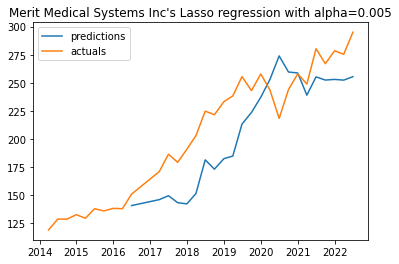

In [5]:
#Multiprocessing using https://www.youtube.com/watch?v=fKl2JW_qrso tutorial.

#Check out this tutorial for how to have some constant arguments, and some that change:
#http://python.omics.wiki/multiprocessing_map/multiprocessing_partial_function_multiple_arguments

company_regression = {}

start = pd.Timestamp.now()
output_df = pd.DataFrame(columns = ['Ticker','Company','Date','GD Estimate','Actuals','Reporting Date', 'MAPE'])
for company, ticker in orders[['Companies','Ticker']].itertuples(index = False):
    try:
        a = pd.Timestamp.now()

        #convert_actuals makes our date_range as well weirdly enough 
        actuals_backup, date_range = pipe.convert_actuals(company=company)

        #Obsolete date_range style. Replaced with convert_actuals' way of making them.
        #date_range_sans_Q12019 = pd.date_range(cutoff + pd.Timedelta("730 days"), actuals_backup.index.max(), freq='Q')

        actuals_backup.dropna(inplace=True)

        #We'll have to iterate through all orders at some point.
        #To read different file formats (why did I do it this way?)
        try:
            df_backup = pd.read_excel(project_path+f"/{company}.xlsx")
        except:
            df_backup = pd.read_pickle(project_path+f"/{company}.pkl")



    #     Converts format of df_backup and actuals_backup into something that can be used.
    #     Mostly done by adding Month, Year and Quarter Columns.
    #     Makes the Date column the index of actuals
    #     Removes ECRI from teh column names in df_backup'''
        actuals_backup, df_backup = pipe.convert_format(df_backup=df_backup, actuals_backup=actuals_backup, project_path=project_path)



        #csv files have some weird formatting like
        # "Standardized Vendor Name...Long" instead of "Standardized Vendor Name - Long"
        # or "Transaction.Date" instead of "Transaction Date"
        # Just fix that up.
        df_backup = pipe.reformat_csv(df_backup)
        actuals_backup = pipe.reformat_csv(actuals_backup)

        #turn Transaction Date and Load Date into datetime objects
        df_backup = pipe.convert_time(X=df_backup, column='Transaction Date')
        df_backup = pipe.convert_time(X=df_backup, column='Load Date')


        df_backup['Quarter'] = df_backup.apply(pipe.find_quarter_number, date_range=date_range, axis=1)



        #Create date range we'll iterate over.
        start_year = actuals_backup.iloc[0].name.year
        start_month = actuals_backup.iloc[0].name.month

        #date_range_sans_Q12019 = [dt.datetime(2018,3,31)]
        cutoff = dt.datetime(start_year, start_month, 1)

        result_list = {}

        regression_info = {}

        #If correlated_agg throws an error, it's because the previous line used actuals_backup instead of actuals
        consistent_agg = pipe.consistent_facilities(X=df_backup, actuals = actuals_backup, top=100, date_range=date_range,percent=0.5)
        #take number depending overall number of facilities per company(percentage?)
        #correlated_agg = pipe.find_best_facilities(X=df, actuals = actuals_backup, date_range=date_range, top=100)

        ddf = df_backup.copy()

        if df_backup.shape[0] <= 8:
            raise ValueError(f"pre-keeptimeperiod df.shape[1] = {df.shape[0]}")
        
        for regression_type in ['Lasso', 'Ridge', 'OLS']:
            print(f"Doing {company}'s {regression_type}'")
        #for regression_type in ['Ridge']:
            predictions = {}
            X_logs = {}
            regressors = {}
            test_logs = []

            for regularization_param in [0.0025, 0.005, 0.01, 0.025]:
                print(f"regularization_param = {regularization_param}")
                #Iterate through all possible choices of alpha. Kind of a waste for OLS but aw well.

                dates = []
                date_preds = {}
                preds = []
                coefficients = []

                X_logs_list = []


                #date_range holds all the quarterly reporting dates from beginning of hospital database to present day.
                #we only start our analysis from Q1 2016, so we iterate from there onwards.
                #Also have to take care of situation where there is no data in Voldemort at date_range[0]
                #In these cases, have to start our dates of interest at a point where I would have had 8 quarters of data already...
                dates_of_interest, date_range = pipe.make_date_ranges(date_range, df_backup)

                print(f"dates_of_interest: {dates_of_interest}")

                #This is our multiprocessing script for handling multiple dates at the same time.
                #All these arguments are static. So they're the same for every partial_quarter_est that gets called in
                #pool.map in like, 4 lines down below.
                partial_quarter_est = partial(pipe.predict_one_quarter,df=df_backup, actuals = actuals_backup, date_range=date_range,
                                              project_path=project_path, regression_type=regression_type,
                                              regularization_param=regularization_param, company=company,consistent_agg=consistent_agg)

                pool = mp.Pool(processes=8)
                #dates_of_interest is a list/array with all the dates I want to predict for in an MP fashion
                #Implicitly being passed to the "date" argument for pipe.predict_one_quarter
                result_list[f"{regression_type}, {regularization_param}"] = pool.map(partial_quarter_est, dates_of_interest)

                pool.close() 
                pool.join()

        #Turn the horrible result_list stuff into things we can actually read and use
        predictions = pipe.results_unpacker(result_list=result_list)

        company_regression[company] = predictions

        ####### Create graph to show fit of plot

        best_reg_type = None
        best_alpha = None
        best_rmse = None
        best_model = None

        for reg_type in predictions.keys():
            for alpha in predictions[reg_type].keys():
                #Iterate through all possible choices of alpha. Kind of a waste for OLS but aw well.
                #We're only considering the latest date here. So date = date_range_sans_Q12019[-1]

                #This is the model that corresponds to this reg_type + alpha combo. We pass it into find_best and find_best
                #will return the better of the current best_model vs. reg_model.
                reg_model = result_list[f"{reg_type}, {alpha}"][-1]['reg_model']

                best_reg_type, best_alpha, best_rmse, best_model = find_best(info = predictions[reg_type][alpha], actuals=actuals_backup, best=[best_reg_type, best_alpha, best_rmse, best_model], params = [reg_type, alpha, reg_model])

        print("*****************")
        print(f"For {company}:")
        print(f"{company}'s prediction processing took {pd.Timestamp.now()-a}")
        print(f"The best set of parameters are:\nRegression Type: {best_reg_type}\nAlpha: {best_alpha}")
        print(f"This gives a final rmse of: {best_rmse}")
        #best_model.to_pickle(project_path + f"predict/{company}'s {best_reg_type} model.pkl")
        #This is how we save those linear regression models
        pickle.dump(best_model, open(project_path + f"/predict/{company}'s {best_reg_type} model.pkl", 'wb'))
        print(f"The best model has been saved to as {company}'s {best_reg_type} model.pkl")

        print("*****************")

        plt.clf()

        plt.plot(company_regression[company][best_reg_type][best_alpha][0], label='predictions')
        if "Quarters" in actuals_backup.columns:
            actuals_backup.drop("Quarters", axis=1, inplace=True)
        plt.plot(actuals_backup["Revenue"], label='actuals')

        plt.legend()
        plt.title(f"{company}'s {best_reg_type} regression with alpha={best_alpha}")

        plt.savefig(project_path+f'/predict/{company} top 100 facilities.png')

        regression_df = company_regression[company][best_reg_type][best_alpha][0]
        #Now merge with actuals to get something more usesful for an estimates sample file.
        regression_df = regression_df.merge(right=actuals_backup, left_index=True, right_index=True)

        regression_df.reset_index(inplace=True)

        if "Quarters" in regression_df.columns:
            regression_df.drop("Quarters", axis=1, inplace=True)
        if regression_df.shape[1] == 3:
            regression_df.columns = ['Date', 'GD Estimate', 'Actuals']
        elif regression_df.shape[1] ==4:
            regression_df.columns = ['Date', 'GD Estimate', 'Actuals', 'Reporting Date']
        else:
            raise ValueError("Wrong number of column in regression_df")
        regression_df['Ticker'] = ticker
        regression_df['Company'] = company
        regression_df['MAPE'] = pd.Series(dtype='int')
        regression_df = regression_df[['Ticker','Company','Date','GD Estimate','Actuals','Reporting Date','MAPE']]
        regression_df.to_excel(project_path+f"/predict/{company}'s {best_reg_type} regression with alpha={best_alpha} top 100 facilities.xlsx") 
        stats_df = pd.DataFrame([{'Ticker': ticker,'Company': company,'Date':'','GD Estimate':'','Actuals':'','Reporting Date':'', 'MAPE': best_rmse}])
        output_df = pd.concat([output_df,stats_df], ignore_index = True)
        output_df = pd.concat([output_df,regression_df], ignore_index=True)
        output_df.to_excel('Tickers with Score.xlsx')
    
    except Exception as e:    
        print(e)
        print(df_backup)
    finally:
        continue
    
output_df.to_excel('Tickers with Score.xlsx')

In [6]:
actuals_backup

,Quarters,Revenue,Reporting Date
Date,,,
2014-03-31,Q1 2014,100.014,2014-05-08
2014-06-30,Q2 2014,100.985,2015-03-31
2014-09-30,Q3 2014,100.994,2015-03-31
2014-12-31,Q4 2014,100.284,2016-02-29
2015-03-31,Q1 2015,89.762,2015-05-18
2015-06-30,Q2 2015,100.954,2015-08-04
2015-09-30,Q3 2015,101.151,2015-11-03
2015-12-31,Q4 2015,104.622,2018-02-26
2016-03-31,Q1 2016,98.679,2017-05-04


In [ ]:
predictions

In [13]:
df_backup[['Transaction Date','Ticker Symbol']].groupby(['Transaction Date']).count().sort_values('Ticker Symbol',ascending=False)

,Ticker Symbol
Transaction Date,
2019-07-01,18
2018-02-01,12
2018-09-01,12
2018-10-01,12
2018-01-01,11
...,...
2016-02-01,1
2016-01-01,1
2015-10-01,1


In [54]:
df_backup.shape

(1026, 11)

#### Save our best model as well

In [1]:
actuals_backup

NameError: name 'actuals_backup' is not defined

In [ ]:
df_backup.iloc[:,-20:]

In [ ]:
len(actuals_backup['Revenue'])

In [ ]:
best_reg_type, best_alpha, best_rmse, best_model = find_best(info = predictions[reg_type][alpha], actuals=actuals_backup, best=[best_reg_type, best_alpha, best_rmse, best_model], params = [reg_type, alpha, reg_model])


print("*****************")
print(f"For {company}:")
print(f"{company}'s prediction processing took {pd.Timestamp.now()-a}")
print(f"The best set of parameters are:\nRegression Type: {best_reg_type}\nAlpha: {best_alpha}")
print(f"This gives a final rmse of: {best_rmse}")
#best_model.to_pickle(project_path + f"predict/{company}'s {best_reg_type} model.pkl")
print(f"The best model has been saved to as {company}'s {best_reg_type} model.pkl")

pickle.dump(best_model, open(project_path + f"/predict/{company}'s {best_reg_type} model.pkl", 'wb'))

print("*****************")

In [ ]:
raise ValueError("Stop")